# Model solution file for week 2 assignment ML

## Introduction

A huge step is always buying a new house. Is it the environment? Is it the general calibre of the house? Is it the size, perhaps? Could it eventually be resold for a profit? Economic growth is crucial since housing demand is frequently seen to be income-elastic, increasing household incomes. Here, we'll utilise machine learning to make data-based predictions about housing prices.

Making a decision about which features should be given priority is undoubtedly tough. In the modern era, machine learning enables an entrepreneur to estimate the house price with the greatest degree of market trend accuracy and to develop a model of the historical dataset on "what happened and why" to predict "what is going to happen."

The project aims to conduct extensive data analysis and the implementation of various machine learning techniques in Python in order to create the best model with the most important features of a house in terms of both business value and realistic perspective. The dataset contains 11 different variables for 532 different houses.

### Aim:
- Performing necessary feature engineering step to clean clean and modify the data.
- Identifying important features that may play important role to predict house price.
- Predicitng house price using a machine learning model

In [ ]:
# Importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
HP_raw = pd.read_csv('House_price.csv') # reading dataset
HP = HP_raw.copy() # creating a new copy

In [ ]:
HP.head() # exploring first five variables to identify anamolies in the data

,h_price,area,no_bedrooms,no_bathrooms,total_stories,mainroad_loc,guestroom,hotwater,airconditioner,parking,furnishingstatus
0,13300000.0,7420.0,4 rooms,2 bathroom,3.0,yes,no,no,yes,2.0,furnished
1,12250000.0,8960.0,4 rooms,4 bathroom,4.0,yes,no,no,yes,3.0,furnished
2,12250000.0,9960.0,3 rooms,2 bathroom,2.0,yes,no,no,no,2.0,semi-furnished
3,12215000.0,7500.0,4 rooms,2 bathroom,2.0,yes,no,no,yes,3.0,furnished
4,11410000.0,NaN,4 rooms,1 bathroom,2.0,yes,yes,no,yes,2.0,furnished


- There are missing values present in few columns

In [ ]:
HP.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 532 entries, 0 to 531
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   h_price           530 non-null    float64
 1   area              516 non-null    float64
 2   no_bedrooms       531 non-null    object 
 3   no_bathrooms      531 non-null    object 
 4   total_stories     530 non-null    float64
 5   mainroad_loc      530 non-null    object 
 6   guestroom         530 non-null    object 
 7   hotwater          531 non-null    object 
 8   airconditioner    530 non-null    object 
 9   parking           531 non-null    float64
 10  furnishingstatus  530 non-null    object 
dtypes: float64(4), object(7)
memory usage: 45.8+ KB


In [ ]:
HP.shape # Rechecking the number of observations and variables in the dataset

(532, 11)

In [ ]:
HP.describe()

,h_price,area,total_stories,parking
count,5.300000e+02,516.000000,530.000000,531.000000
mean,4.780457e+06,5173.277132,1.800000,0.691149
std,1.871737e+06,2196.618447,0.863895,0.859298
min,1.750000e+06,1650.000000,1.000000,0.000000
25%,3.465000e+06,3596.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,2.000000,0.000000
75%,5.766250e+06,6405.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,4.000000,3.000000


In [ ]:
HP.columns

Index(['h_price', 'area', 'no_bedrooms', 'no_bathrooms', 'total_stories',
       'mainroad_loc', 'guestroom', 'hotwater', 'airconditioner', 'parking',
       'furnishingstatus'],
      dtype='object')

### Dealing with missing values

In [ ]:
HP.isnull().sum() # checking total number of missing values in each column

h_price              2
area                16
no_bedrooms          1
no_bathrooms         1
total_stories        2
mainroad_loc         2
guestroom            2
hotwater             1
airconditioner       2
parking              1
furnishingstatus     2
dtype: int64

In [ ]:
# checking if one observation has missing values more than 1
Missing_I = HP.isnull().sum(axis = 1)
Missing_I = Missing_I[Missing_I > 1]
Missing_I

90     7
121    7
dtype: int64

In [ ]:
# exploring all rows and columns
pd.options.display.max_columns = None
pd.options.display.max_rows = None
display(HP)

,h_price,area,no_bedrooms,no_bathrooms,total_stories,mainroad_loc,guestroom,hotwater,airconditioner,parking,furnishingstatus
0,13300000.0,7420.0,4 rooms,2 bathroom,3.0,yes,no,no,yes,2.0,furnished
1,12250000.0,8960.0,4 rooms,4 bathroom,4.0,yes,no,no,yes,3.0,furnished
2,12250000.0,9960.0,3 rooms,2 bathroom,2.0,yes,no,no,no,2.0,semi-furnished
3,12215000.0,7500.0,4 rooms,2 bathroom,2.0,yes,no,no,yes,3.0,furnished
4,11410000.0,NaN,4 rooms,1 bathroom,2.0,yes,yes,no,yes,2.0,furnished
5,10850000.0,7500.0,3 rooms,3 bathroom,1.0,yes,no,no,yes,2.0,semi-furnished
6,10150000.0,8580.0,4 rooms,3 bathroom,4.0,yes,no,no,yes,2.0,semi-furnished
7,10150000.0,16200.0,5 rooms,3 bathroom,2.0,yes,no,no,no,0.0,unfurnished
8,9870000.0,8100.0,4 rooms,1 bathroom,2.0,yes,yes,no,yes,2.0,furnished
9,9800000.0,5750.0,3 rooms,2 bathroom,4.0,yes,yes,no,yes,1.0,unfurnished


<AxesSubplot:>

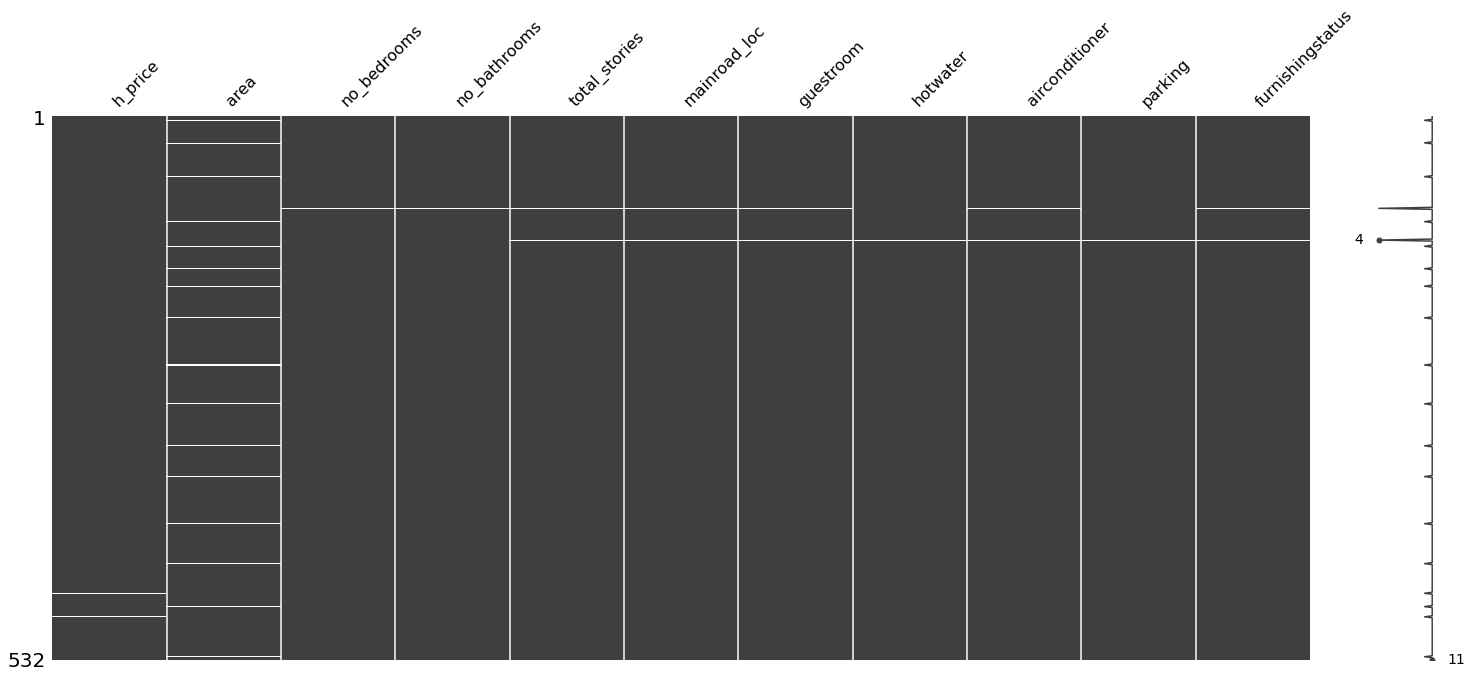

In [ ]:
# visualization of missing values
import missingno as msno
msno.matrix(HP)

- Apart from area column, rest other columns have very less missing values.
- Either we can remove them or replace with something like mean or median too.
- Label data (house price) also has some missing values. We have to remove it as it is labelled column.
- There are 7 missing values in index 90 and 121. It is also very clear from missing plots. Hence, they have to be romoved.

In [ ]:
# Dropping the 2 rows with null values for all variables
HP.drop(HP[HP['total_stories'].isnull()].index,axis=0, inplace=True)

In [ ]:
# Dropping the null values from target variable
HP.drop(HP[HP['h_price'].isnull()].index,axis=0, inplace=True)

In [ ]:
HP.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 528 entries, 0 to 531
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   h_price           528 non-null    float64
 1   area              512 non-null    float64
 2   no_bedrooms       528 non-null    object 
 3   no_bathrooms      528 non-null    object 
 4   total_stories     528 non-null    float64
 5   mainroad_loc      528 non-null    object 
 6   guestroom         528 non-null    object 
 7   hotwater          528 non-null    object 
 8   airconditioner    528 non-null    object 
 9   parking           528 non-null    float64
 10  furnishingstatus  528 non-null    object 
dtypes: float64(4), object(7)
memory usage: 49.5+ KB


### Before dealing with missing values we have to encode all categorical data

In [ ]:
# Ordinal encoding for number of bedroom, bathroom and furnishing status
# we can also use regular expression too
from sklearn.preprocessing import OrdinalEncoder
Or_enc = OrdinalEncoder()
HP[["no_bedrooms","no_bathrooms", "furnishingstatus"]] = Or_enc.fit_transform(HP[["no_bedrooms","no_bathrooms", "furnishingstatus"]])

In [ ]:
# label encoding for rest categorical variable
from sklearn.preprocessing import LabelEncoder

for col in ["mainroad_loc","guestroom", "hotwater", "airconditioner"]:
    HP[col] = LabelEncoder().fit_transform(HP[col])

In [ ]:
HP.head()

,h_price,area,no_bedrooms,no_bathrooms,total_stories,mainroad_loc,guestroom,hotwater,airconditioner,parking,furnishingstatus
0,13300000.0,7420.0,3.0,1.0,3.0,1,0,0,1,2.0,0.0
1,12250000.0,8960.0,3.0,3.0,4.0,1,0,0,1,3.0,0.0
2,12250000.0,9960.0,2.0,1.0,2.0,1,0,0,0,2.0,1.0
3,12215000.0,7500.0,3.0,1.0,2.0,1,0,0,1,3.0,0.0
4,11410000.0,NaN,3.0,0.0,2.0,1,1,0,1,2.0,0.0


In [ ]:
# To avoid data leakage from outcom variable splitting the data set
Independent = HP.drop('h_price',axis=1)
Independent.head()

,area,no_bedrooms,no_bathrooms,total_stories,mainroad_loc,guestroom,hotwater,airconditioner,parking,furnishingstatus
0,7420.0,3.0,1.0,3.0,1,0,0,1,2.0,0.0
1,8960.0,3.0,3.0,4.0,1,0,0,1,3.0,0.0
2,9960.0,2.0,1.0,2.0,1,0,0,0,2.0,1.0
3,7500.0,3.0,1.0,2.0,1,0,0,1,3.0,0.0
4,NaN,3.0,0.0,2.0,1,1,0,1,2.0,0.0


In [ ]:
Dependent = HP['h_price'] # creating Y variable only
Dependent.head()

0    13300000.0
1    12250000.0
2    12250000.0
3    12215000.0
4    11410000.0
Name: h_price, dtype: float64

In [ ]:
# Imputation using KNN
from fancyimpute import KNN
knn_imputer = KNN()
Independent_knn = Independent.copy(deep=True)
Independent_knn.iloc[:, :] = knn_imputer.fit_transform(Independent_knn)

Imputing row 1/528 with 0 missing, elapsed time: 0.043
Imputing row 101/528 with 0 missing, elapsed time: 0.043
Imputing row 201/528 with 0 missing, elapsed time: 0.043
Imputing row 301/528 with 0 missing, elapsed time: 0.043
Imputing row 401/528 with 0 missing, elapsed time: 0.043
Imputing row 501/528 with 0 missing, elapsed time: 0.051


In [ ]:
# Imputation using MICE
from fancyimpute import IterativeImputer
MICE_imputer = IterativeImputer()
Independent_MICE = Independent.copy(deep=True)
Independent_MICE.iloc[:, :] = MICE_imputer.fit_transform(Independent_MICE)

<AxesSubplot:xlabel='area', ylabel='Count'>

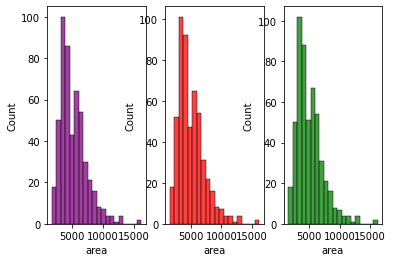

In [ ]:
fig, ax =plt.subplots(1,3)
sns.histplot(HP['area'],bins=20, color="purple", ax=ax[0])
sns.histplot(Independent_knn['area'], color="red", bins=20, ax=ax[1])
sns.histplot(Independent_MICE['area'], color="green", bins=20, ax=ax[2])

C:\Users\sandy\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\sandy\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\sandy\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='area'>

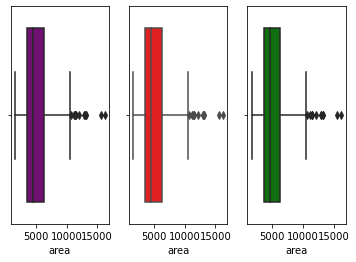

In [ ]:
fig, ax =plt.subplots(1,3)
sns.boxplot(HP['area'], color="purple", ax=ax[0])
sns.boxplot(Independent_knn['area'], color="red", ax=ax[1])
sns.boxplot(Independent_MICE['area'], color="green", ax=ax[2])

In [ ]:
Independent_knn.describe() # using describe function to see if there is any discrepency in numerical measures

,area,no_bedrooms,no_bathrooms,total_stories,mainroad_loc,guestroom,hotwater,airconditioner,parking,furnishingstatus
count,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000
mean,5162.840220,1.964015,0.284091,1.803030,0.857955,0.179924,0.045455,0.320076,0.695076,1.077652
std,2182.518656,0.739655,0.503095,0.864123,0.349428,0.384489,0.208496,0.466948,0.860152,0.756774
min,1650.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3600.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.750000
50%,4580.000000,2.000000,0.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,6360.000000,2.000000,1.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000,2.000000
max,16200.000000,5.000000,3.000000,4.000000,1.000000,1.000000,1.000000,1.000000,3.000000,2.000000


In [ ]:
Independent_MICE.describe() # using describe function to see if there is any discrepency in numerical measures

,area,no_bedrooms,no_bathrooms,total_stories,mainroad_loc,guestroom,hotwater,airconditioner,parking,furnishingstatus
count,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000
mean,5169.721163,1.964015,0.284091,1.803030,0.857955,0.179924,0.045455,0.320076,0.695076,1.077652
std,2173.611257,0.739655,0.503095,0.864123,0.349428,0.384489,0.208496,0.466948,0.860152,0.756774
min,1650.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3600.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.750000
50%,4615.820057,2.000000,0.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,6360.000000,2.000000,1.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000,2.000000
max,16200.000000,5.000000,3.000000,4.000000,1.000000,1.000000,1.000000,1.000000,3.000000,2.000000


- From overall exploration it seems that MICE and KNN both performed well
- Hence, I will go ahead with KNN imputation

In [ ]:
HP_miss = pd.concat([Independent_knn, Dependent], axis=1) # concatenating independent and dependent variable
HP_miss.head(10)

,area,no_bedrooms,no_bathrooms,total_stories,mainroad_loc,guestroom,hotwater,airconditioner,parking,furnishingstatus,h_price
0,7420.000000,3.0,1.0,3.0,1.0,0.0,0.0,1.0,2.0,0.0,13300000.0
1,8960.000000,3.0,3.0,4.0,1.0,0.0,0.0,1.0,3.0,0.0,12250000.0
2,9960.000000,2.0,1.0,2.0,1.0,0.0,0.0,0.0,2.0,1.0,12250000.0
3,7500.000000,3.0,1.0,2.0,1.0,0.0,0.0,1.0,3.0,0.0,12215000.0
4,8099.945192,3.0,0.0,2.0,1.0,1.0,0.0,1.0,2.0,0.0,11410000.0
5,7500.000000,2.0,2.0,1.0,1.0,0.0,0.0,1.0,2.0,1.0,10850000.0
6,8580.000000,3.0,2.0,4.0,1.0,0.0,0.0,1.0,2.0,1.0,10150000.0
7,16200.000000,4.0,2.0,2.0,1.0,0.0,0.0,0.0,0.0,2.0,10150000.0
8,8100.000000,3.0,0.0,2.0,1.0,1.0,0.0,1.0,2.0,0.0,9870000.0
9,5750.000000,2.0,1.0,4.0,1.0,1.0,0.0,1.0,1.0,2.0,9800000.0


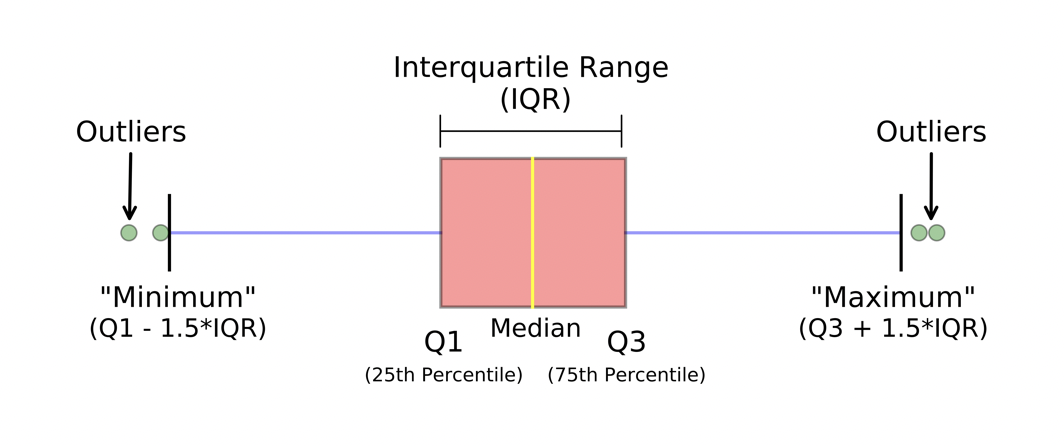

### Dealing with outliers

In [ ]:
# Here I am using IQR to remove outliers. I have already checked Z score and did not work well
# IQR for price column
Q1 = HP_miss['h_price'].quantile(0.25)
Q3 = HP_miss['h_price'].quantile(0.75)
print(Q3, Q1)
IQR = Q3 - Q1
print(IQR)
upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR
print(upper_bound)
print(lower_bound)

5740000.0 3465000.0
2275000.0
9152500.0
52500.0


In [ ]:
HP_miss_out = HP_miss[HP_miss.h_price < upper_bound]
HP_miss_out = HP_miss_out[HP_miss.h_price > lower_bound]
HP_miss_out.shape

C:\Users\sandy\AppData\Local\Temp/ipykernel_12748/1866707801.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  HP_miss_out = HP_miss_out[HP_miss.h_price > lower_bound]


(513, 11)

<AxesSubplot:xlabel='h_price', ylabel='Count'>

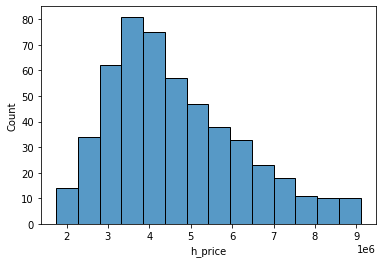

In [ ]:
sns.histplot(HP_miss_out['h_price'])

In [ ]:
# Here I am using IQR to remove outliers. I have already checked Z score and did not work well
# IQR for price column
Q1 = HP_miss_out['area'].quantile(0.25)
Q3 = HP_miss_out['area'].quantile(0.75)
print(Q3, Q1)
IQR = Q3 - Q1
print(IQR)
upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR
print(upper_bound)
print(lower_bound)

6321.0 3584.0
2737.0
10426.5
-521.5


In [ ]:
HP_miss_out = HP_miss_out[HP_miss.area < upper_bound]
HP_miss_out = HP_miss_out[HP_miss.area > lower_bound]
HP_miss_out.shape

C:\Users\sandy\AppData\Local\Temp/ipykernel_12748/3980939757.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  HP_miss_out = HP_miss_out[HP_miss.area < upper_bound]
C:\Users\sandy\AppData\Local\Temp/ipykernel_12748/3980939757.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  HP_miss_out = HP_miss_out[HP_miss.area > lower_bound]


(500, 11)

<AxesSubplot:xlabel='area', ylabel='Count'>

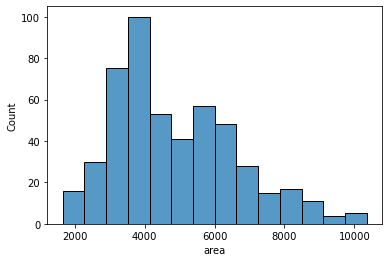

In [ ]:
sns.histplot(HP_miss_out['area']) # examining distribution of area column

- Even after removing outliers price and area columns are skewed.
- For linear regression, errors should be normally distributed. However, as per central limit theorem if sample size is more than 30 we are good to go.

C:\Users\sandy\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='h_price', ylabel='area'>

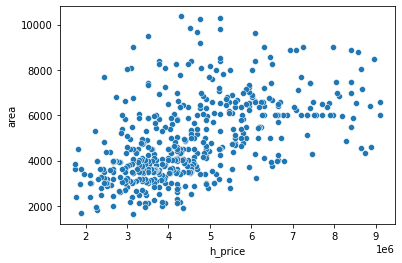

In [ ]:
# scatter plot between area and price
sns.scatterplot(HP_miss_out.h_price, HP_miss_out.area)

In [ ]:
data = pd.DataFrame(HP_miss_out) # checking correlation only between price and area
print(data.corr(method = 'spearman'))

                      area  no_bedrooms  no_bathrooms  total_stories  \
area              1.000000     0.148777      0.195659       0.042915   
no_bedrooms       0.148777     1.000000      0.360151       0.510301   
no_bathrooms      0.195659     0.360151      1.000000       0.292542   
total_stories     0.042915     0.510301      0.292542       1.000000   
mainroad_loc      0.328205    -0.025744      0.027910       0.084053   
guestroom         0.251026     0.089055      0.156024       0.018469   
hotwater         -0.033229     0.014585      0.040439       0.051932   
airconditioner    0.295852     0.173915      0.209135       0.234156   
parking           0.334091     0.102540      0.131408      -0.008298   
furnishingstatus -0.155728    -0.133968     -0.161125      -0.101542   
h_price           0.572912     0.369470      0.453527       0.354870   

                  mainroad_loc  guestroom  hotwater  airconditioner   parking  \
area                  0.328205   0.251026 -0.033229   

- Price and area not very linear. There are moderate correlation.

In [ ]:
HP_miss_out.head()

,area,no_bedrooms,no_bathrooms,total_stories,mainroad_loc,guestroom,hotwater,airconditioner,parking,furnishingstatus,h_price
15,6000.0,3.0,0.0,2.0,1.0,0.0,0.0,0.0,2.0,1.0,9100000.0
16,6600.0,3.0,1.0,2.0,1.0,1.0,0.0,1.0,1.0,2.0,9100000.0
17,8500.0,2.0,1.0,4.0,1.0,0.0,0.0,1.0,2.0,0.0,8960000.0
18,4600.0,2.0,1.0,2.0,1.0,1.0,0.0,1.0,2.0,0.0,8890000.0
19,6420.0,2.0,1.0,2.0,1.0,0.0,0.0,1.0,1.0,1.0,8855000.0


In [ ]:
# Examine multicollinearity using VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

# the independent variables set
X_vif = HP_miss_out.drop(['h_price'], axis=1)

# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X_vif.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X_vif.values, i)
                          for i in range(len(X_vif.columns))]

print(vif_data)

            feature       VIF
0              area  9.662710
1       no_bedrooms  8.371096
2      no_bathrooms  1.595123
3     total_stories  7.045119
4      mainroad_loc  6.496517
5         guestroom  1.329238
6          hotwater  1.066743
7    airconditioner  1.746203
8           parking  1.913895
9  furnishingstatus  2.645623


- It seems that area, no_bedrooms, total_stories, and mainroad_loc are highly correlated

In [ ]:
X_vif = HP_miss_out.drop(['h_price', 'no_bedrooms', 'total_stories', 'mainroad_loc'], axis=1)

# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X_vif.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X_vif.values, i)
                          for i in range(len(X_vif.columns))]

print(vif_data)

            feature       VIF
0              area  4.740717
1      no_bathrooms  1.406234
2         guestroom  1.322778
3          hotwater  1.054821
4    airconditioner  1.639921
5           parking  1.888405
6  furnishingstatus  2.339361


- after removing no of bedrooms, total stories and main road location correlation values look better now

### Feature selection using selectK best method

In [ ]:
# apply SelectKBest class to extract top 10 best features
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features

              Specs          Score
0              area  172705.025438
8           parking     252.638749
2      no_bathrooms     227.441446
5         guestroom     224.755810
6          hotwater     200.336312
7    airconditioner     185.834255
9  furnishingstatus     129.899002
3     total_stories     118.837686
1       no_bedrooms      68.142844
4      mainroad_loc      34.609889


- It seems that number of bedrooms and main road location are not good predictor variable. However, total stories is also highly correlated with area.

In [ ]:
# Linear regression
X_lin = HP_miss_out.drop(['h_price', 'no_bedrooms', 'total_stories', 'mainroad_loc'], axis=1)
y_lin = HP_miss_out['h_price']

In [ ]:
X_lin.shape

(500, 7)

In [ ]:
# splitting the dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_lin, y_lin, test_size=0.25, random_state=101)

In [ ]:
# performing transformation of data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train=sc.fit_transform(X_train)
X_train

array([[-0.56034738, -0.47907014, -0.23102118, ...,  0.42552676,
         1.14918462, -0.14757584],
       [ 1.60594404,  2.08737703, -0.23102118, ..., -0.75649202,
        -1.49464503, -1.15963441],
       [ 1.60594404, -0.47907014, -0.23102118, ...,  1.60754555,
        -0.1727302 , -0.45988076],
       ...,
       [ 1.60594404, -0.47907014, -0.23102118, ..., -0.75649202,
        -0.1727302 , -0.72477917],
       [ 1.60594404,  2.08737703, -0.23102118, ..., -0.75649202,
        -0.1727302 ,  0.66708716],
       [-0.56034738, -0.47907014, -0.23102118, ..., -0.75649202,
        -0.1727302 ,  0.00319188]])

In [ ]:
X_test=sc.transform(X_test)
X_test

array([[-5.60347381e-01,  2.08737703e+00, -2.31021182e-01,
         1.50361882e+00,  4.25526762e-01, -1.49464503e+00,
         1.08246709e+00],
       [-5.60347381e-01, -4.79070138e-01, -2.31021182e-01,
        -6.65062172e-01,  4.25526762e-01, -1.72730204e-01,
         1.27809936e+00],
       [-5.60347381e-01,  2.08737703e+00, -2.31021182e-01,
        -6.65062172e-01, -7.56492022e-01, -1.72730204e-01,
         6.46890552e-01],
       [ 1.60594404e+00, -4.79070138e-01, -2.31021182e-01,
         1.50361882e+00,  4.25526762e-01, -1.72730204e-01,
         9.10075271e-01],
       [-5.60347381e-01, -4.79070138e-01, -2.31021182e-01,
         1.50361882e+00, -7.56492022e-01, -1.72730204e-01,
         7.70982089e-01],
       [-5.60347381e-01, -4.79070138e-01, -2.31021182e-01,
        -6.65062172e-01, -7.56492022e-01,  1.14918462e+00,
        -6.26120011e-01],
       [ 1.60594404e+00, -4.79070138e-01, -2.31021182e-01,
        -6.65062172e-01,  4.25526762e-01,  1.14918462e+00,
        -1.8027658

In [ ]:
# importing cost function libraries
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

In [ ]:
# fitting linear regression model
lm = LinearRegression()
lm.fit(X_train,y_train)
# regression coefficients
print('Coefficients: ', lm.coef_)

Coefficients:  [ 523183.88402183  225144.19421913  183319.94400125  498458.1471346
  133097.80092469 -200751.0201337   497087.236279  ]


In [ ]:
# fitting model into test data
y_pred = lm.predict(X_train)

In [ ]:
# calculting rsquared value
r2 = r2_score(y_true=y_train,y_pred=y_pred)
print(r2)

0.6122185184711437


In [ ]:
# calculting adjusted rsquared value
N=X.shape[0]
p=5
x = (1-r2)
y = (N-1) / (N-p-1)
adj_rsquared = (1 - (x * y))
print("Adjusted-R2 : " , adj_rsquared)

Adjusted-R2 :  0.6082936046904873


In [ ]:
# Checking mean value for residuala
residuals = y_train.values-y_pred
mean_residuals = np.mean(residuals)
print("Mean of Residuals {}".format(mean_residuals))

Mean of Residuals 1.4280279477437336e-10


- Mean value is close to 0 hence we are good to go

C:\Users\sandy\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\sandy\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


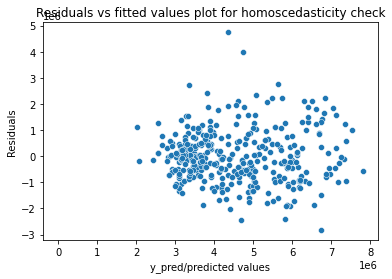

In [ ]:
# scatter plot between predicted value and error
p = sns.scatterplot(y_pred, residuals)
plt.xlabel('y_pred/predicted values')
plt.ylabel('Residuals')
p = sns.lineplot([0,2.6],[0,0],color='blue')
p = plt.title('Residuals vs fitted values plot for homoscedasticity check')

C:\Users\sandy\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='h_price', ylabel='Density'>

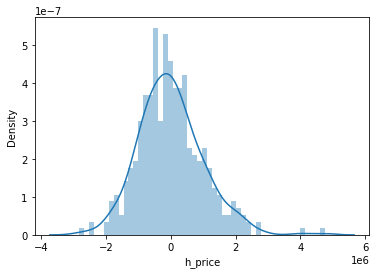

In [ ]:
# checking if errors are normally distributed are not
sns.distplot((y_train-y_pred),bins=50)

In [ ]:
predictions = lm.predict(X_test) # predicting test set

In [ ]:
y_test.head()

33     8120000.0
390    3500000.0
128    5810000.0
19     8855000.0
183    5110000.0
Name: h_price, dtype: float64

In [ ]:
predictions


array([6299688.72831512, 4472741.88996896, 4579472.62851454,
       6504167.28531225, 5144332.97889532, 3103478.89700001,
       4615794.83629225, 3915379.43407582, 6214533.15865725,
       4467576.7692832 , 2536522.03632969, 3624552.02169755,
       5648942.65922852, 4063588.80022617, 3793736.86725135,
       5013929.00379806, 3122756.26095364, 2489537.91175084,
       5051648.07804202, 3898695.40294738, 4727699.01769163,
       3937724.74625416, 4377560.12664478, 3587555.8844294 ,
       3778890.20493581, 3459694.347858  , 5940606.94119441,
       4658548.51779944, 3918761.60454199, 3182447.6166144 ,
       7043829.00721923, 2758964.49957476, 3193066.94327074,
       4788326.31266246, 4926449.0459912 , 4974909.07060974,
       5988215.2256264 , 3227303.83369079, 2917071.86681268,
       3983225.79249417, 4487004.62449397, 3107178.72130188,
       3488701.19127352, 5259401.05246544, 4302998.41432932,
       4329273.44910259, 2783072.73159688, 3994001.02830039,
       4732952.51908492,

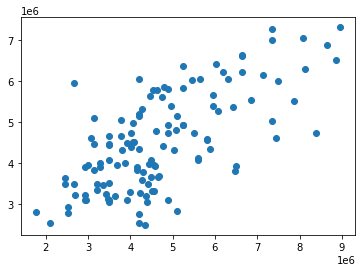

In [ ]:
# scatter plot between actaul and predicted value
plt.scatter(y_test,predictions)

In [ ]:
# Calculating error
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 902532.8852364848
MSE: 1310074299157.105
RMSE: 1144584.7715032317


## XGboost

In [ ]:
# XGBoost
X = HP_miss_out.drop(['h_price', 'no_bedrooms', 'total_stories'], axis=1) # number of bedrooms and total stories are not good predictor
y = HP_miss_out['h_price']

In [ ]:
# we will convert the dataset into an optimized data structure called Dmatrix that XGBoost supports
data_dmatrix = xgb.DMatrix(data=X,label=y)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)  #For splitting the test data


In [ ]:
#We have to instantiate an XGBoost regressor object by calling the XGBRegressor() class from the XGBoost library with the hyper-parameters passed as arguments.
xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
max_depth = 5, alpha = 10, n_estimators = 10)

In [ ]:
#Fit the regressor to the training set and make predictions on the test set using the familiar .fit() and .predict() methods
xg_reg.fit(X_train,y_train)
preds = xg_reg.predict(X_test)


[13:04:03] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-08de971ced8a8cdc6-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
# we have to #Compute the rmse by invoking the mean_sqaured_error function from sklearn's
#metrics module.
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))


RMSE: 2158399.225595


## Random forest regression

In [ ]:
# Importing library
from sklearn.ensemble import RandomForestRegressor

 # create regressor object
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)

# fit the regressor with x and y data
regressor.fit(X_train, y_train)

RandomForestRegressor(random_state=0)

In [ ]:
# performing prediction
y_pred = regressor.predict(X_test)
y_pred

array([6284985.        , 4921280.        , 3863860.        ,
       7647430.        , 4945640.        , 2300304.08333333,
       4692327.5       , 4064060.        , 4954460.        ,
       3688335.        , 2820790.        , 3441900.        ,
       6879180.        , 3086370.        , 4089050.        ,
       5318880.        , 3192955.5       , 2501100.        ,
       4153660.        , 4450390.        , 4929260.        ,
       3997840.        , 4654930.        , 4109899.5       ,
       4759195.        , 3393740.        , 4271960.        ,
       4765670.        , 4412100.        , 3777095.        ,
       7903700.        , 3073558.83333333, 3037002.5       ,
       4992493.33333333, 4583460.        , 4839625.        ,
       4813620.        , 3113110.        , 2404430.        ,
       4785900.        , 3815805.        , 2300304.08333333,
       4234195.        , 4165420.        , 4062395.        ,
       4681880.        , 2468573.33333333, 4741100.        ,
       4327365.        ,

In [ ]:
# calculating error
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 899790.7560000002
MSE: 1321354311394.4067
RMSE: 1149501.766590381


## Support vector regression

In [ ]:
# Importing SVR library and creating model
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X_train, y_train)

SVR()

In [ ]:
y_pred = regressor.predict(X_test) # prediciting y

In [ ]:
# Calculating error
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 1189061.8302153759
MSE: 2634614177409.064
RMSE: 1623149.4624368588


### Conclusion
Here, we performed 4 different models to check which model seems to give a better accuracy or least error. Overall, number of bedrooms and location from the main road do not seem to be a good predictor of a house price. Hence, they were dropped from all models. Linear regression seems to be the best model as it has the lowest error, but linear relationship between price and area is not very linear. Random forest model may be the best model in this scenario. We can also perform cross validation and parameter optimization to improve the model accuracy.

**Note**: This a basic model using correct approach. We can still perform more models, parameter optimization and cross validation to identify the best model for the project.